# Create a neural network to solve the MNIST problem using Keras using ChatGPT

## Data

In [1]:
import time
t0 = time.time()
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# Calculating notebook running time


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize the pixel values (0-255) to be between 0 and 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
          activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

X_val = X_test[:2000]
y_val = y_test[:2000]
X_test = X_test[2000:]
y_test = y_test[2000:]

# train the model
history = model.fit(X_train, y_train, batch_size=32,
                    epochs=10, validation_data=(X_val, y_val))
print(F"Took {time.time()-t0:.2f} secs to run ")


11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/10
1875/1875 [==============================] - 19s 6ms/step - loss: 0.1421 - accuracy: 0.9567 - val_loss: 0.0741 - val_accuracy: 0.9750
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0475 - accuracy: 0.9858 - val_loss: 0.0615 - val_accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0512 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0522 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0467 - val_accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0689 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step -

In [3]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print(F"Took {time.time()-t0:.2f} secs to run ")


250/250 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9904
Test accuracy: 0.9903749823570251
Took 92.60 secs to run 


## plot the training and validation loss

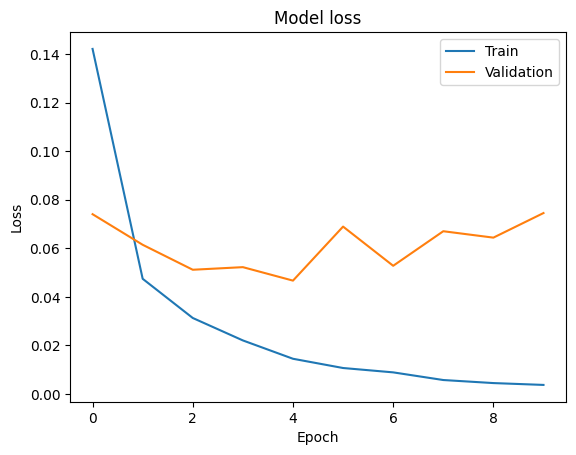

Took 92.88 secs to run 


In [4]:
# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
print(F"Took {time.time()-t0:.2f} secs to run ")


### Summary

In [5]:
model.summary()
print(F"Took {time.time()-t0:.2f} secs to run ")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

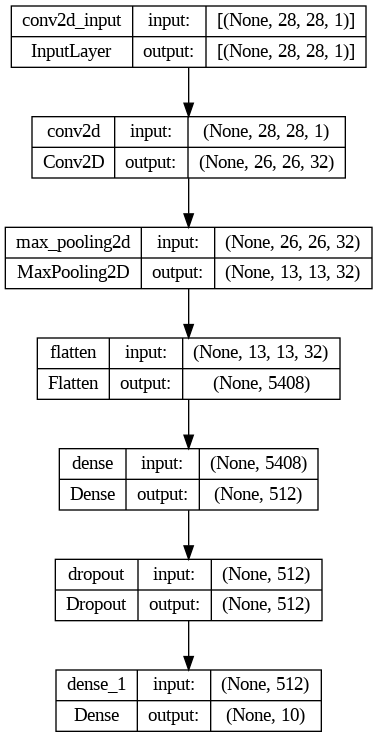

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


### Save model  

In [7]:
#model.save('model.h5')


### Prediction

In [8]:
from keras.models import load_model


class Predictor:
    def __init__(self, model_path):
        self.model_path = model_path
        self.model = None

    def predict(self, image):
        # load the model from disk if it hasn't been loaded
        if self.model is None:
            self.model = load_model(self.model_path)

        # predict the image
        prediction = self.model.predict(image)

        # return the predicted label
        return np.argmax(prediction)


In [9]:
# select 10 random images from the test set
random_indices = np.random.randint(0, len(X_test), 10)
random_images = X_test[random_indices]
random_labels = y_test[random_indices]

#predictor = Predictor("model.h5")

#for i in range(10):
#    predicted_label = predictor.predict(random_images[i].reshape(1, 28, 28, 1))
#    print("True Label: ", random_labels[i],
#          "Predicted Label: ", predicted_label)


250/250 [==============================] - 1s 2ms/step


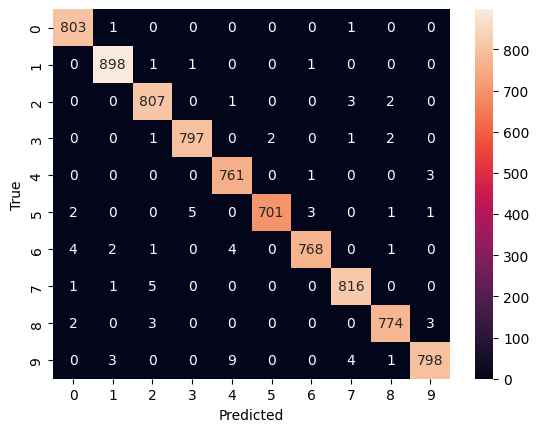

In [10]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [12]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14345104360579241852
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4720162147995474582
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


### Testing Google Colab integration 

In [11]:
# Integration successfull. This line is being updated from VsCode
print(F"Took {time.time()-t0:.2f} secs to run ")


Took 95.29 secs to run 


PC : MacBook Air 2017 Runtime : ~ 24 mins (1454 secs )   

Colab CPU : ~ 19 min (1114.73 secs)

Colab GPU : ~1.5 min (92.92 secs ) Tesla T4 GPU